<a href="https://colab.research.google.com/github/PurnaTejitha12/Automated-Customer-Complaint-Analyzer/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Step 2
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_excel("/content/Consumer_Complaints.xlsx")

In [ ]:
# Display first few rows
print("Initial Data:")
print(df.head())

Initial Data:
   Complaint ID Submitted via Date submitted Date received State  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Refund anticipation check   
2                            Credit reporting   
3                General-purpose prepaid car

In [ ]:
# Step 3: Check for Missing Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64


In [ ]:
# Drop rows with missing complaint text
df = df.dropna(subset=['Issue'])

In [ ]:
# Step 4: Select Relevant Columns
# Adjust column names according to your dataset
df = df[['Issue', 'Product']].copy()

In [ ]:
# Step 5: Text Cleaning Function
def clean_text(text):
    text = str(text).lower()                                 # Convert to lowercase
    text = re.sub(r'\d+', '', text)                          # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)                      # Remove punctuation/special characters
    text = re.sub(r'\s+', ' ', text).strip()                 # Remove extra spaces
    return text

df['cleaned_text'] = df['Issue'].apply(clean_text)

In [ ]:
# Step 6: Remove Stopwords and Lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_tokens(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]      # Lemmatization
    return ' '.join(tokens)

df['processed_text'] = df['cleaned_text'].apply(preprocess_tokens)

In [ ]:
# Step 7: Encode Labels
# Encode the 'Product' column as numerical labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Product'])

In [ ]:
# Step 8: Split Data for Model Training
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 9: Display Final Processed Data
print("\nSample of Processed Data:")
print(df[['processed_text', 'label']].head())


Sample of Processed Data:
                                    processed_text  label
0  applying mortgage refinancing existing mortgage      5
1                                lost stolen check      4
2                     incorrect information report      2
3             problem getting card closing account      1
4                                  closing account      1


Model Implementation

In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel("/content/Consumer_Complaints.xlsx")

In [ ]:
print(df.columns)

Index(['Complaint ID', 'Submitted via', 'Date submitted', 'Date received',
       'State', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'Company response to consumer',
       'Timely response?'],
      dtype='object')


In [ ]:
# Step 3: Convert Text to TF-IDF Features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Step 4: Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Initialize Models
log_reg = LogisticRegression(max_iter=300)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
# Step 6: Train the Models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:19:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Step 7: Make Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Step 8: Evaluate Models
print("\n📊 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n🌲 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n⚡ XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


📊 Logistic Regression Performance:
Accuracy: 0.9577735124760077
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4905
           1       0.99      0.89      0.94      3276
           2       0.85      0.99      0.92      1525
           3       1.00      1.00      1.00       555
           4       0.98      0.97      0.97       691
           5       1.00      0.96      0.98      1348
           6       0.98      0.73      0.84        60
           7       1.00      0.67      0.80         9
           8       0.97      0.90      0.93       135

    accuracy                           0.96     12504
   macro avg       0.97      0.90      0.93     12504
weighted avg       0.96      0.96      0.96     12504


🌲 Random Forest Performance:
Accuracy: 0.957853486884197
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4905
           1       0.99      0.89      0.94      3276
         

In [ ]:
# Step 9: Compare Model Accuracies
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print("\n📈 Model Comparison:\n", results_df)


📈 Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.957774
1        Random Forest  0.957853
2              XGBoost  0.957853


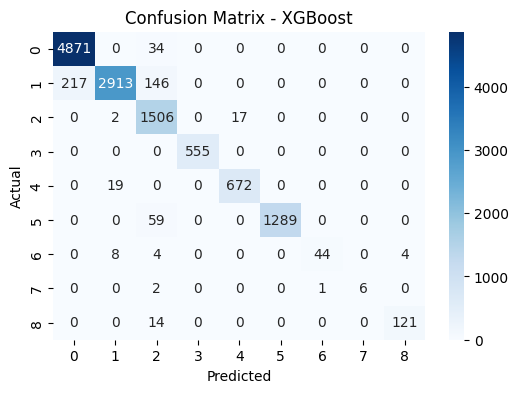

In [ ]:
# Step 10: Display Confusion Matrix for Best Model (Example: XGBoost)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve and AUC for Models

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

In [ ]:
# Step 1: Binarize the output labels (for multi-class ROC)
y_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_bin.shape[1]

In [ ]:
# Step 2: Train models in One-vs-Rest format
lr_ovr = OneVsRestClassifier(LogisticRegression(max_iter=300))
rf_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
xgb_ovr = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))

In [ ]:
lr_ovr.fit(X_train, y_train)
rf_ovr.fit(X_train, y_train)
xgb_ovr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:37:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:37:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:38:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:38:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:38:03] WARNING: /w

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [ ]:
y_score_lr = lr_ovr.predict_proba(X_test)
y_score_rf = rf_ovr.predict_proba(X_test)
y_score_xgb = xgb_ovr.predict_proba(X_test)

In [ ]:
# Step 4: Plot ROC Curves for all models
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr_lr, tpr_lr, _ = roc_curve(y_bin[:, i], y_score_lr[:, i])
    fpr_rf, tpr_rf, _ = roc_curve(y_bin[:, i], y_score_rf[:, i])
    fpr_xgb, tpr_xgb, _ = roc_curve(y_bin[:, i], y_score_xgb[:, i])

    roc_auc_lr = auc(fpr_lr, tpr_lr)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

<Figure size 800x600 with 0 Axes>

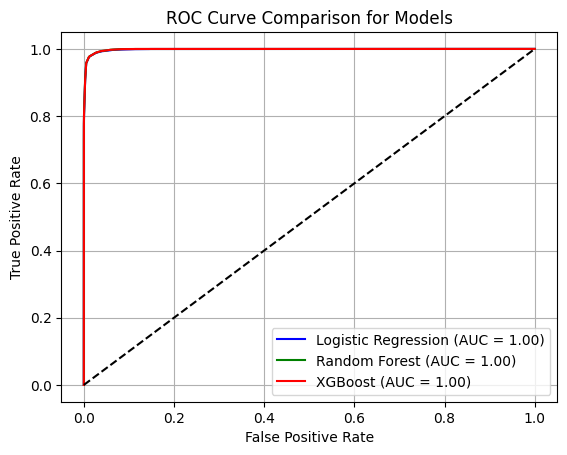

In [ ]:
# Step 5: Average ROC Curves for comparison
fpr_lr, tpr_lr, _ = roc_curve(y_bin.ravel(), y_score_lr.ravel())
fpr_rf, tpr_rf, _ = roc_curve(y_bin.ravel(), y_score_rf.ravel())
fpr_xgb, tpr_xgb, _ = roc_curve(y_bin.ravel(), y_score_xgb.ravel())

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

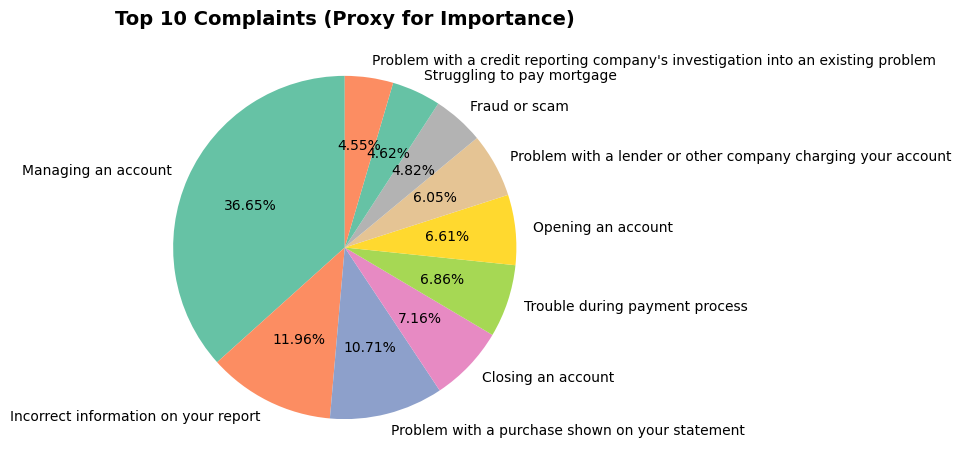

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/Consumer_Complaints.xlsx")

# Step 1: Get top 10 complaint issues
top_complaints = df['Issue'].value_counts().head(10)

# Step 2: Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    top_complaints.values,
    labels=top_complaints.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=plt.cm.Set2.colors  # nice pastel color palette
)
plt.title("Top 10 Complaints (Proxy for Importance)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# First, upload the file using this code if not already uploaded:
# from google.colab import files
# uploaded = files.upload()

# Load your Excel file (replace filename if needed)
df = pd.read_excel('/content/Consumer_Complaints.xlsx')

# Display the first few rows to inspect which columns contain complaint types/frequencies
print(df.head())

# Assuming you have a column e.g. "Complaint Type" and another counting complaints, like "Count"
# If you don't, adjust the column names per your actual dataset.
# Let's count complaints by type
top_complaints = df['Issue'].value_counts().nlargest(10)
labels = top_complaints.index
sizes = top_complaints.values

# Identify Most and Least Severe Complaint
most_severe = labels[0]
most_severe_count = sizes[0]
least_severe = labels[-1]
least_severe_count = sizes[-1]

print(f"Most Severe/Important: {most_severe} ({most_severe_count})")
print(f"Least Severe/Important: {least_severe} ({least_severe_count})")

   Complaint ID Submitted via Date submitted Date received State  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Refund anticipation check   
2                            Credit reporting   
3                General-purpose prepaid card   
4  Genera

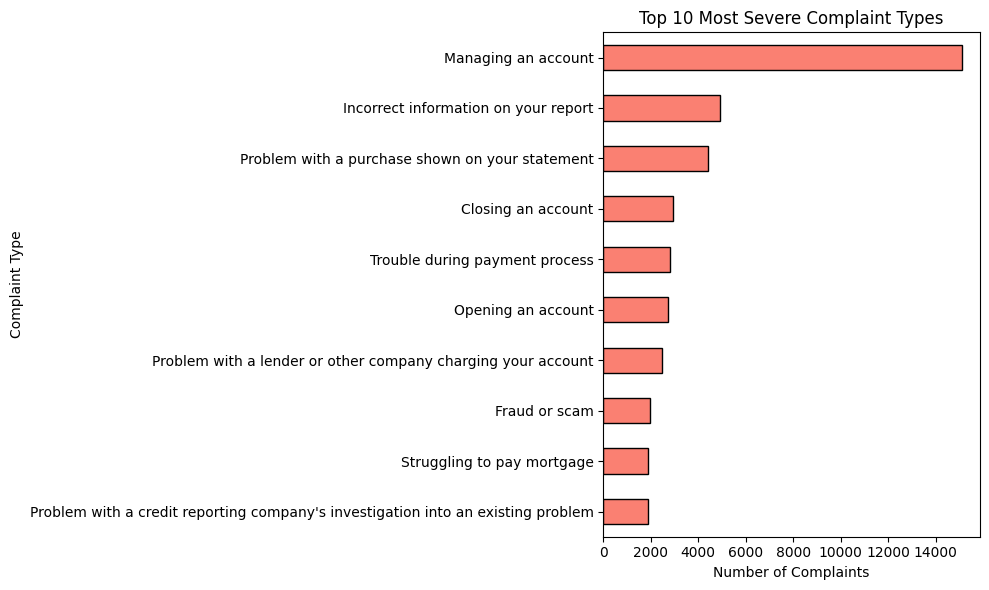

In [ ]:
# Bar Chart
plt.figure(figsize=(10,6))
top_complaints.sort_values().plot(
    kind='barh',
    color='salmon',
    edgecolor='black'
)
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.title('Top 10 Most Severe Complaint Types')
plt.tight_layout()
plt.show()